In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

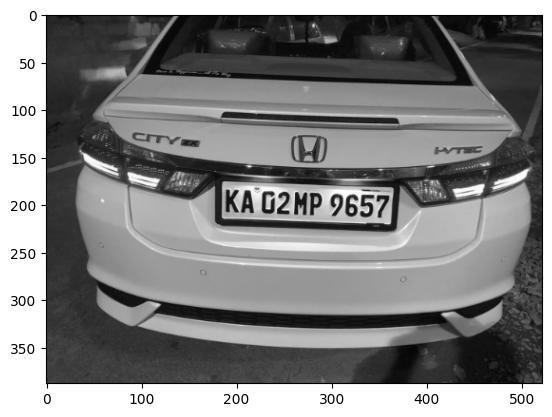

In [3]:
img = cv2.imread('C:/Users/prath/Downloads/Screenshot 2025-04-21 214619.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #we have to pass colored image as matplotlib presents in this form after that we change it to gray scale
#convert colored img to grayscale img format bcoz in red green blue has large pixel count

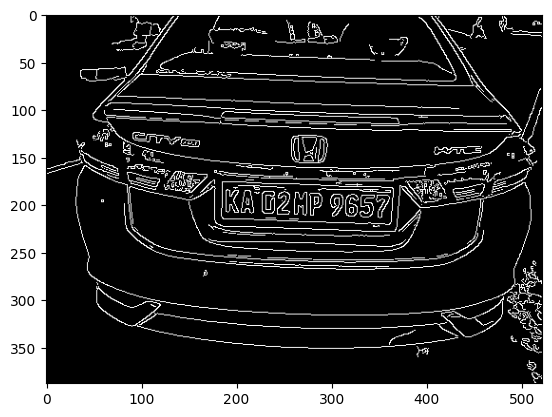

In [4]:
bfilter = cv2.bilateralFilter(gray , 11 , 17, 17) #noise redc
edged = cv2.Canny(bfilter, 30, 120) #edge detc
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
#we apply edge filter as it reduces data from the picture so that our model runs fast

In [5]:
#We use contours as it detects the shapes in the image in which car's no is written. Number plate is stored in the the rectangular shape
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[185, 176]],

       [[186, 215]],

       [[363, 218]],

       [[364, 182]]], dtype=int32)

In [8]:
#Noe we will do masking so that our model can produce output more easily
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

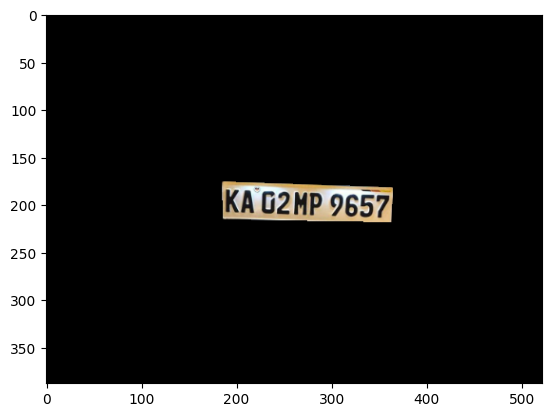

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
#points which we get in location, unhe chod kar baaki saare pixels off kardiye

In [ ]:
#x1 and y1 are the upper points in the upward image and x2 and y2 are the lower points and cropped that area
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

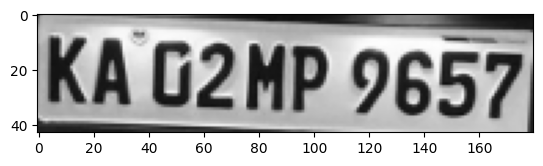

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en']) #en denots the language of the number plate is english
result = reader.readtext(cropped_image)
result
#92% is the accuracy

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[1, 3], [180, 3], [180, 43], [1, 43]], 'KA G2MP 9657', 0.9260976884854657)]

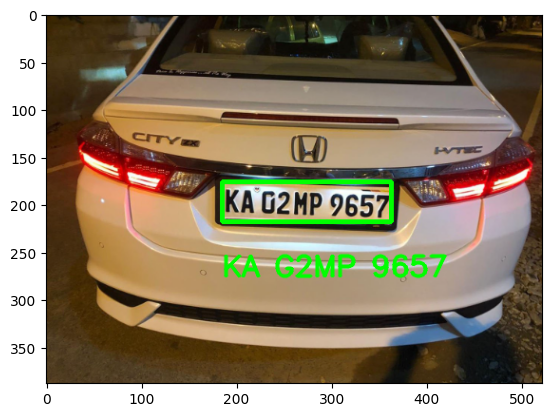

In [18]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))